In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

print("libraries imported successfully")

libraries imported successfully


In [2]:
datatype={'fare_amount':'float64','pickup_datetime':'object', 'pickup_longitude':'float64', 'pickup_latitude':'float64',
       'dropoff_longitude':'float64', 'dropoff_latitude':'float64', 'passenger_count':'int64'}

In [3]:
df = pd.read_csv('EDA_data.csv',dtype = datatype,parse_dates=['pickup_datetime'])

In [4]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'year', 'month', 'day', 'weekday',
       'pickup_datetime_hour', 'distance_km'],
      dtype='object')

In [6]:
X= df.drop(['fare_amount','pickup_datetime','Unnamed: 0'],axis=1)
Y= df[['fare_amount']]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=21)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4495639, 11), (1926703, 11), (4495639, 1), (1926703, 1))

## Keras Tuner

In [14]:
!pip install -q -U keras-tuner

In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [44]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=1,
    directory='project',
    project_name='nyc Project')

In [45]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [46]:
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_test, Y_test))

In [47]:
tuner.results_summary()

Results summary
Results in project/nyc Project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 128
learning_rate: 0.001
units_2: 192
units_3: 320
units_4: 224
units_5: 448
units_6: 32
units_7: 384
units_8: 160
units_9: 352
Score: 1.5258374214172363
Trial summary
Hyperparameters:
num_layers: 19
units_0: 480
units_1: 416
learning_rate: 0.0001
units_2: 288
units_3: 192
units_4: 288
units_5: 160
units_6: 384
units_7: 352
units_8: 64
units_9: 352
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 2.8036012649536133
Trial summary
Hyperparameters:
num_layers: 15
units_0: 192
units_1: 384
learning_rate: 0.0001
units_2: 160
units_3: 384
units_4: 128
units_5: 224
units_6: 128
units_7: 128
units_8: 448
units_9: 352
units_10: 288
units_11: 384
units_12: 224
units_13: 192
units_14: 128
units_15: 256
units_16: 416
units_17: 96
units_18: 512
Score: 2.912412405014038
Trial summary
Hyperpa

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
n_features = X_train.shape[1]
n_features

11

In [10]:
model1 = Sequential()
model1.add(Dense(11, activation='relu', input_shape=(n_features,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(192, activation='relu'))
model1.add(Dense(320, activation='relu'))
model1.add(Dense(224, activation='relu'))
model1.add(Dense(448, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(384, activation='relu'))
model1.add(Dense(160, activation='relu'))
model1.add(Dense(352, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 192)               24768     
                                                                 
 dense_3 (Dense)             (None, 320)               61760     
                                                                 
 dense_4 (Dense)             (None, 224)               71904     
                                                                 
 dense_5 (Dense)             (None, 448)               100800    
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [12]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [13]:
history = model1.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=1)#,callbacks=[es])

Epoch 1/10
98343/98343 [==============================] - 882s 9ms/step - loss: 6.3804 - mae: 1.8098 - val_loss: 6.0004 - val_mae: 1.7070
Epoch 2/10
98343/98343 [==============================] - 885s 9ms/step - loss: 5.8857 - mae: 1.7398 - val_loss: 6.2663 - val_mae: 1.7168
Epoch 3/10
98343/98343 [==============================] - 880s 9ms/step - loss: 5.8229 - mae: 1.7127 - val_loss: 5.6970 - val_mae: 1.7626
Epoch 4/10
98343/98343 [==============================] - 767s 8ms/step - loss: 5.6682 - mae: 1.6991 - val_loss: 5.5468 - val_mae: 1.6464
Epoch 5/10
98343/98343 [==============================] - 714s 7ms/step - loss: 5.6446 - mae: 1.6932 - val_loss: 5.6453 - val_mae: 1.6491
Epoch 6/10
98343/98343 [==============================] - 784s 8ms/step - loss: 5.6282 - mae: 1.6883 - val_loss: 5.5199 - val_mae: 1.6425
Epoch 7/10
98343/98343 [==============================] - 798s 8ms/step - loss: 5.6112 - mae: 1.6862 - val_loss: 5.5306 - val_mae: 1.6483
Epoch 8/10
98343/98343 [==========

In [14]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def eval_fun(model,X_train,Y_train,Y_test,X_test):

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(Y_train,Y_pred_train)
    mse_train = mean_squared_error(Y_train,Y_pred_train)
    mae_train = mean_absolute_error(Y_train,Y_pred_train)
    print(f"r2_train_score ==> {r2_train} , mse_train_score ==> {mse_train} , mae_train_score ==> {mae_train}")
  
    r2_test = r2_score(Y_test,Y_pred_test)
    mse_test = mean_squared_error(Y_test,Y_pred_test)
    mae_test = mean_absolute_error(Y_test,Y_pred_test)
    print(f"r2_test_score ==> {r2_test} , mse_test_score ==> {mse_test} , mae_test_score ==> {mae_test}")

In [15]:
eval_fun(model1,X_train,Y_train,Y_test,X_test)

60210/60210 [==============================] - 532s 9ms/step
r2_train_score ==> 0.6951253645021067 , mse_train_score ==> 5.593869222629566 , mae_train_score ==> 1.7316769581589837
r2_test_score ==> 0.6951710944770294 , mse_test_score ==> 5.602755298574723 , mae_test_score ==> 1.7322260146082025


In [16]:
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.732


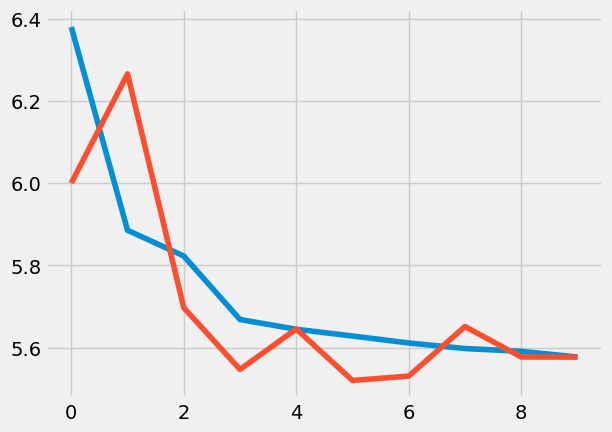

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])